In [2]:
# Import necessary packages
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Newer versions use `tsa.arima.model.ARIMA`
from sklearn.metrics import mean_squared_error
import warnings

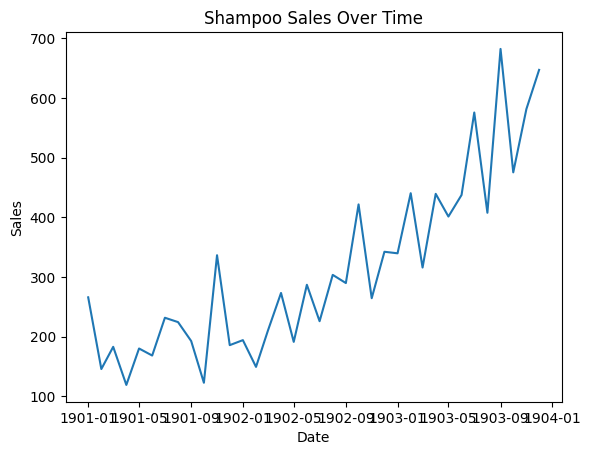

Mean Squared Error (MSE): 33099.1085044036


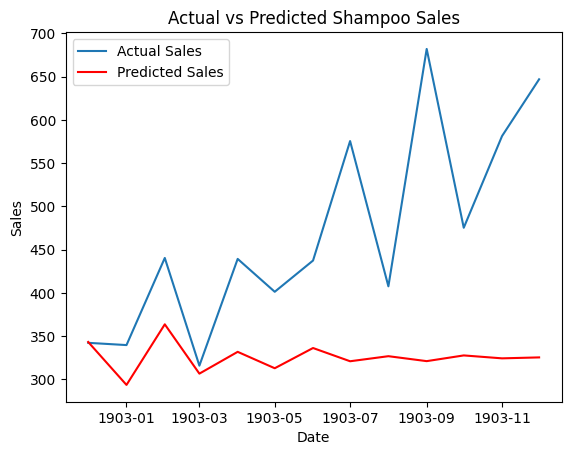

In [5]:
# Ignore warnings for clean output
warnings.filterwarnings("ignore")

# Define a date parser function for reading the CSV
def parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

# Load the shampoo sales dataset
url = '/content/shampoo_sales.csv'  # Download and replace with the actual path
series = read_csv(url, header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Visualize the time series data
plt.plot(series)
plt.title('Shampoo Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Split data into training and testing sets
train_size = int(len(series) * 0.66)
train, test = series[0:train_size], series[train_size:]

# Build and fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # The (p,d,q) order might need tuning based on data
model_fit = model.fit()

# Make predictions and calculate MSE
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)

# Print results
print(f'Mean Squared Error (MSE): {mse}')

# Plot actual vs predicted values
plt.plot(test, label='Actual Sales')
plt.plot(test.index, predictions, color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Shampoo Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()